<a href="https://colab.research.google.com/github/sky16k/pyda/blob/main/PYDA18_class_clust_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys
data_path = '/content/data'
try:
    os.symlink('/content/drive/MyDrive/скул/DS/data', data_path)
    sys.path.insert(0,data_path)
except:
    pass
# Then you can install a library, and specify the target.
# !pip install --target=$data_path vk_api_config.py

Mounted at /content/drive


#Домашнее задание

## осн. текст

In [ ]:
'''
Задание
Домашнее задание к лекции «Задачи классификации и кластеризации»

Текст задания также доступен тут http://prntscr.com/umci7o

Задание.

Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
Разделите данные на выборку для обучения и тестирования
Постройте модель LDA
Визуализируйте предсказания для тестовой выборки и центры классов
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию
'''

'\nЗадание\nДомашнее задание к лекции «Задачи классификации и кластеризации»\n\nТекст задания также доступен тут http://prntscr.com/umci7o\n\nЗадание.\n\nВозьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)\nОставьте два признака - sepal_length и sepal_width и целевую переменную - variety\nРазделите данные на выборку для обучения и тестирования\nПостройте модель LDA\nВизуализируйте предсказания для тестовой выборки и центры классов\nОтбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width\nПодберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию\n'

## Задание 1

###текст

In [ ]:
# комментарий эксперта
'''

'''

'\n\n'

In [ ]:
'''

Возьмите датасет с цветками iris’а 
(функция load_iris из библиотеки sklearn)
Оставьте два признака - sepal_length и sepal_width 
и целевую переменную - variety
Разделите данные на выборку для обучения и тестирования
Постройте модель LDA
Визуализируйте предсказания для тестовой выборки 
и центры классов
Отбросьте целевую переменную и оставьте только два признака 
- sepal_length и sepal_width
Подберите оптимальное число кластеров 
для алгоритма kmeans и визуализируйте 
полученную кластеризацию

'''

'\n\nВозьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)\nОставьте два признака - sepal_length и sepal_width и целевую переменную - variety\nРазделите данные на выборку для обучения и тестирования\nПостройте модель LDA\nВизуализируйте предсказания для тестовой выборки и центры классов\nОтбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width\nПодберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию\n\n'

###программа

#### ввод и подготовка данных

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [4]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [5]:
iris = load_iris()

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data = data.loc[:,['sepal length (cm)','sepal width (cm)']]
data_class = iris.target
variety = data_class

In [6]:
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25, random_state=42)

In [ ]:
len(y_test)

38

#### Классификация

In [9]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [10]:
lda = LinearDiscriminantAnalysis()

In [11]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [12]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0])

In [13]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [14]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_test, lda.predict(X_test))

0.868421052631579

86% можно считать неплохим результатом, однако более взвешенную оценку можно дать только в конце анализа

In [16]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-5.83421967,  8.36880937],
       [ 1.5215595 , -3.81430503],
       [ 3.81202284, -3.79343242]])

In [17]:

# Intercept term. #?пересечение с Z
lda.intercept_ #: array, shape (n_features,)


array([  3.35398812,   1.07579685, -13.24137777])

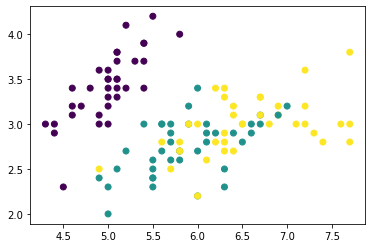

In [18]:
plt.scatter(x=X_train['sepal length (cm)'], y=X_train['sepal width (cm)'], c=y_train)
plt.show()

In [19]:
# посмотрим на наши центроиды
lda.means_

array([[4.99714286, 3.42857143],
       [5.88717949, 2.75128205],
       [6.53947368, 2.97894737]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


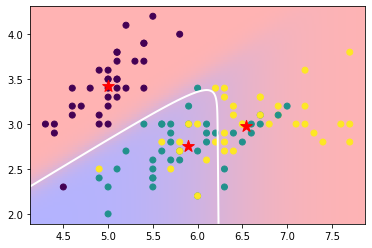

In [20]:
# сам scatter plot
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем будет ли класс каждой точки нашей сетки равен "1"
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами относительно класса "1"
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

судя по визуализации и учитывая неполноту данных, на основе которых проводился анализ, и явное пересечение 2 групп в поле показателей параметров 'sepal length' и 'sepal width' можно считать 86% верных ответов хорошим результатом

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


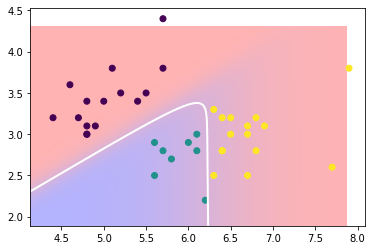

In [21]:
# визуализация разделения на тесте
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda.predict(X_test))
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

In [ ]:
data[['sepal length (cm)', 'sepal width (cm)']].corr()

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


#### Кластеризация

In [22]:
from sklearn.cluster import KMeans

In [25]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 25)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(data)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

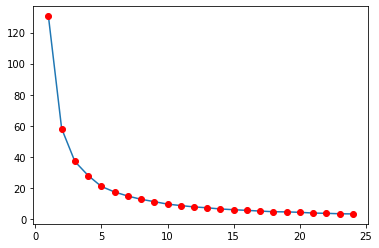

In [26]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

судя по графику инерции, выбираем количество кластеров = 4

In [38]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=4)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data)
clusters

array([0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 1, 1, 1, 3, 1, 3, 3, 2, 1, 2, 2, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1,
       1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3], dtype=int32)

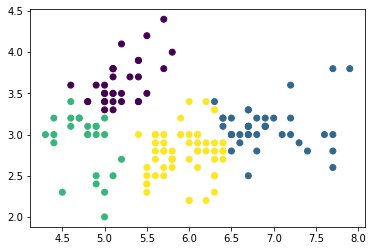

In [39]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'],  c=clusters,)# s=60) # cmap='autumn',

судя по визуализации, разбиение на 4 кластера делит одну явную группу "слева-сверху". 
вместе с тем, чисто визуально, разбиение на 2 кластера выглядит более логично.
поэтому попробуем взять 2 кластера.

In [46]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

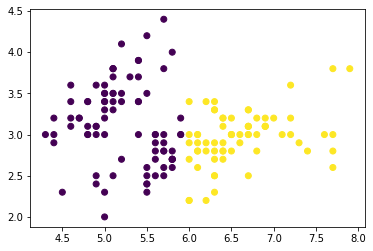

In [47]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'],  c=clusters,)# s=60) # cmap='autumn',

Видимо, из-за разницы в размере групп, алгоритм К-средних для такого набора данных плохо подходит, относя часть большого облака к другому. Поэтому попробуем задать 3 кластера.

In [40]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

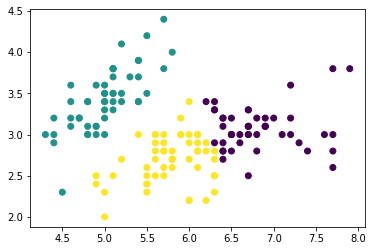

In [41]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'],  c=clusters,)# s=60) # cmap='autumn',

Теперь разбиение выглядит более логичным, хотя и не лишенным некоторых артефактов (точка "слева-внизу"). 


# Теория: Задачи классификации и кластеризации



Булыгин Олег:  
* [LinkedIn](linkedin.com/in/obulygin)  
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [ ]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [ ]:
wine = load_wine()

In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

In [ ]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25, random_state=42)

In [ ]:
len(y_test)

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [ ]:
result

,0,1
0,0,0
1,0,0
2,2,2
3,0,0
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,2,2


In [ ]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, lda.predict(X_test))

1.0

In [ ]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 2.77785654e+00, -2.62823777e-01,  6.34033699e+00,
        -9.23264800e-01,  1.12148061e-03, -1.73622434e+00,
         4.95743646e+00,  3.14554165e+00, -1.19253447e+00,
        -8.98034416e-01, -1.73258088e-01,  3.81064150e+00,
         1.36856107e-02],
       [-2.00764892e+00, -4.89578703e-01, -6.54854947e+00,
         4.49722072e-01,  4.06933168e-05, -7.56394603e-01,
         1.34633325e+00,  2.67670321e+00,  1.06737575e+00,
        -6.98689535e-01,  3.51943073e+00,  4.92874648e-01,
        -5.99014310e-03],
       [-4.39452636e-01,  1.04199771e+00,  1.89161928e+00,
         4.66343927e-01, -1.43060813e-03,  3.23563291e+00,
        -8.04119074e+00, -7.78525286e+00, -1.13872164e-01,
         2.12622388e+00, -4.96962424e+00, -5.38307173e+00,
        -7.90803569e-03]])

In [ ]:
# визуализируем дискриминантные линии только по 2 признакам
small_train = X_train[['ash', 'flavanoids']]
small_test = X_test[['ash', 'flavanoids']]



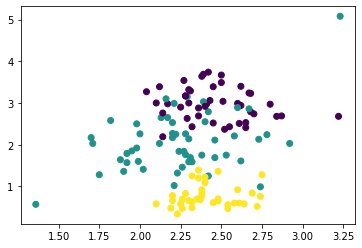

In [ ]:
plt.scatter(x=small_train['ash'], y=small_train['flavanoids'], c=y_train)
plt.show()

In [ ]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.45795455, 2.98522727],
       [2.24735849, 2.07150943],
       [2.41416667, 0.76888889]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


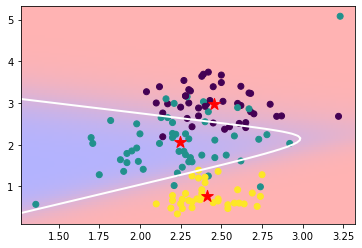

In [ ]:
# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=y_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


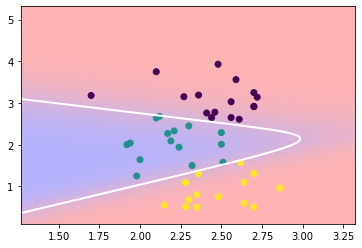

In [ ]:
# визуализация разделения на тесте
plt.scatter(small_test['ash'], small_test['flavanoids'], c=lda_small.predict(small_test))
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

In [ ]:
# второй признак во много раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[-0.35930524,  3.52752381],
       [-1.82165655,  0.40785359],
       [ 3.1210341 , -4.9118691 ]])

In [ ]:
# какая будет точность?
accuracy_score(y_test, lda_small.predict(small_test))

0.8

In [ ]:
data[['flavanoids', 'ash']].corr()

,flavanoids,ash
flavanoids,1.000000,0.115077
ash,0.115077,1.000000


In [ ]:
# заменим модель на логистическую регрессиию
# кому интересно, отличия логистической регрессии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая переменная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(small_train, y_train)

LogisticRegression()

In [ ]:
lr.predict(small_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 1,
       2])

In [ ]:
# вероятность принадлежности к тому или иному классу
lr.predict_proba(small_test)

array([[7.56315717e-01, 2.42697431e-01, 9.86852178e-04],
       [5.42061819e-01, 4.52843490e-01, 5.09469115e-03],
       [8.53373614e-04, 3.62038881e-02, 9.62942738e-01],
       [8.58097850e-01, 1.41530850e-01, 3.71299934e-04],
       [1.20564684e-01, 8.51587157e-01, 2.78481588e-02],
       [8.33120043e-01, 1.66221700e-01, 6.58256678e-04],
       [6.43497819e-02, 8.28135786e-01, 1.07514432e-01],
       [3.35801055e-03, 1.21839544e-01, 8.74802446e-01],
       [7.55525954e-01, 2.42549226e-01, 1.92482047e-03],
       [9.97058289e-04, 7.36030133e-02, 9.25399928e-01],
       [5.86569969e-01, 4.05915005e-01, 7.51502572e-03],
       [1.00038895e-01, 5.55831728e-01, 3.44129377e-01],
       [4.32620704e-01, 5.64484610e-01, 2.89468530e-03],
       [2.29300956e-02, 6.69161853e-01, 3.07908052e-01],
       [7.51728984e-01, 2.46250167e-01, 2.02084982e-03],
       [2.61788671e-01, 7.21911814e-01, 1.62995145e-02],
       [2.45880961e-01, 6.79717516e-01, 7.44015224e-02],
       [9.48186628e-02, 6.14480

In [ ]:
accuracy_score(y_test, lr.predict(small_test))

0.8

In [ ]:
lr.coef_

array([[ 0.34145518,  2.46350785],
       [-1.24113815,  0.44535339],
       [ 0.89968298, -2.90886124]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


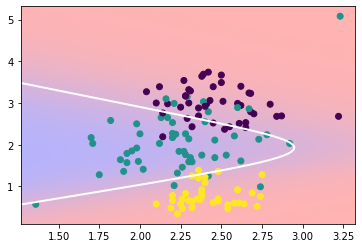

In [ ]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=y_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


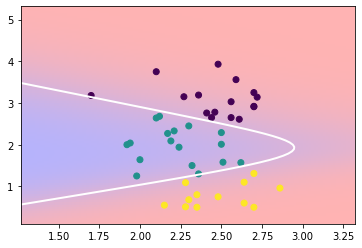

In [ ]:
plt.scatter(small_test['ash'], small_test['flavanoids'], c=lr.predict(small_test))

nx, ny = 200, 100
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

## Кластеризация

In [ ]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_blobs

In [ ]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

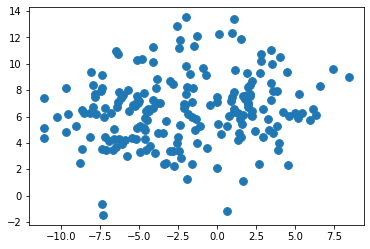

In [ ]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [ ]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

В реальных задачах при разделении выборки на train и test нужно обучать StandardScaler только на тренировочных данных (и применять уже к тестовым данным).


In [ ]:
v_1 = np.array(np.random.randint(0, 1000, 500))
v_2 = np.array(np.random.randint(0, 10, 500))

In [ ]:
print(v_1.max())
print(v_1.min())

print(v_2.max())
print(v_2.min())

996
3
9
0


In [ ]:
v_1_scaled = scaler.fit_transform(v_1.reshape(-1, 1))
v_1_scaled
v_2_scaled = scaler.fit_transform(v_2.reshape(-1, 1))
v_2_scaled

array([[ 1.14301611],
       [-0.91523619],
       [ 0.79997406],
       [-0.22915209],
       [-0.57219414],
       [-0.57219414],
       [ 1.14301611],
       [-1.60132029],
       [ 1.14301611],
       [-0.22915209],
       [ 0.45693201],
       [-0.22915209],
       [ 0.45693201],
       [ 1.48605817],
       [ 1.14301611],
       [ 0.79997406],
       [ 0.11388996],
       [ 0.11388996],
       [-1.60132029],
       [ 0.79997406],
       [-0.91523619],
       [ 1.48605817],
       [ 0.45693201],
       [ 1.48605817],
       [ 0.79997406],
       [-0.22915209],
       [-0.22915209],
       [ 0.79997406],
       [-1.60132029],
       [ 0.45693201],
       [-1.25827824],
       [ 1.14301611],
       [-0.22915209],
       [ 0.45693201],
       [ 1.14301611],
       [-0.57219414],
       [ 1.14301611],
       [-1.25827824],
       [ 0.11388996],
       [-0.22915209],
       [ 1.14301611],
       [-0.22915209],
       [-0.91523619],
       [ 1.14301611],
       [-1.25827824],
       [-0

In [ ]:
print(v_1_scaled.max())
print(v_1_scaled.min())

print(v_2_scaled.max())
print(v_2_scaled.min())

1.7002858396779186
-1.7832450939770863
1.4860581657673082
-1.601320294968097


In [ ]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.97918142,  0.70272923],
       [-0.31228509, -1.55017015],
       [-0.543815  ,  0.01468067],
       [-1.51985547, -1.13362616],
       [-0.66711927, -0.4534148 ],
       [-0.3738403 ,  0.20750222],
       [ 0.17389443,  2.14255025],
       [-1.88544456, -0.20697913],
       [ 0.47639045, -0.40880852],
       [ 0.6149975 , -0.45815218],
       [-1.21062783, -3.03463626],
       [ 0.97812853, -0.02510888],
       [ 0.8547424 ,  0.40267705],
       [-0.72014671, -0.8399424 ],
       [ 0.84982137, -2.06829173],
       [ 0.92451859,  0.19756346],
       [-1.54513363, -1.53938897],
       [ 0.72214423,  0.02129294],
       [-1.71516899, -0.1045304 ],
       [ 2.4001695 ,  0.94571312],
       [ 2.17834344,  1.1737829 ],
       [ 0.02520714,  0.65306932],
       [-0.10359739, -0.78029013],
       [-0.0791208 ,  2.02331007],
       [ 0.62129265, -2.92899955],
       [-0.74036281,  0.10311429],
       [ 1.10914083,  1.41325763],
       [-0.85073748, -1.34302384],
       [ 0.50211396,

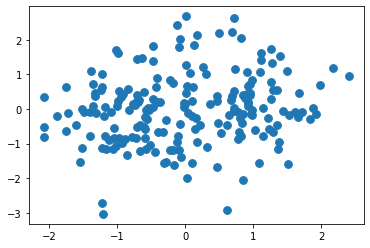

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2,
       1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0,
       1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0,
       1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1,
       0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 2,
       2, 0], dtype=int32)

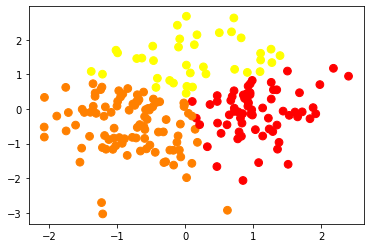

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [ ]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

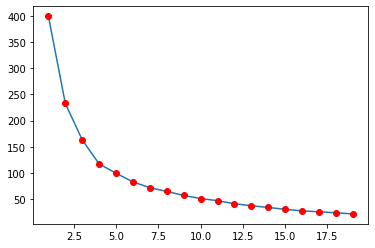

In [ ]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Иерархическая кластеризация

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

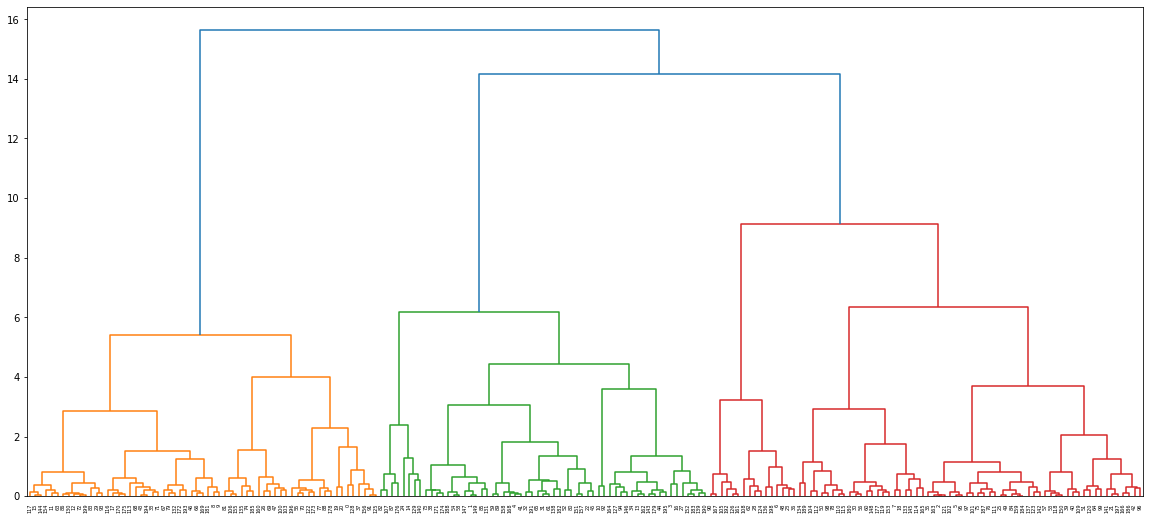

In [ ]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [ ]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [ ]:
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(X_scaled)
clusters

array([1, 2, 0, 2, 2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0,
       2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 2, 0, 1,
       2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 1, 2,
       1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 1, 2,
       1, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 0,
       1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 1, 0,
       0, 1])

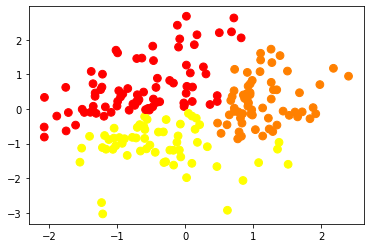

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [ ]:
df = pd.DataFrame(X)
df['y_hat'] = clusters
df

,0,1,y_hat
0,6.599842,8.349394,1
1,-3.411675,2.439519,2
2,-4.423239,6.544484,0
3,-8.687603,3.532210,2
4,-4.961961,5.316561,2
...,...,...,...
195,-5.937478,4.246020,2
196,4.240899,6.338612,1
197,-1.572767,8.164517,0
198,-1.965426,13.531826,0
